# Taller de Segmentación RFM

En este notebook aprenderemos a realizar una segmentación RFM completa paso a paso. Se utilizarán datos de transacciones y se explicará cada parte del proceso. ¡Sigue las instrucciones y ejecuta cada celda para ir avanzando!

In [11]:
!wget https://github.com/javierherrera1996/IntroMarketingAnalytics/raw/refs/heads/main/SegundoCorte/Case%201_Online%20Retail.xlsx%20-%20Online%20Retail.csv.zip
!unzip "Case 1_Online Retail.xlsx - Online Retail.csv.zip"

--2025-04-03 00:52:21--  https://github.com/javierherrera1996/IntroMarketingAnalytics/raw/refs/heads/main/SegundoCorte/Case%201_Online%20Retail.xlsx%20-%20Online%20Retail.csv.zip
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/IntroMarketingAnalytics/refs/heads/main/SegundoCorte/Case%201_Online%20Retail.xlsx%20-%20Online%20Retail.csv.zip [following]
--2025-04-03 00:52:21--  https://raw.githubusercontent.com/javierherrera1996/IntroMarketingAnalytics/refs/heads/main/SegundoCorte/Case%201_Online%20Retail.xlsx%20-%20Online%20Retail.csv.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Le

## 1. Preparación de Datos

Primero, cargaremos la librería necesaria y prepararemos los datos. Para este ejemplo, vamos a simular un DataFrame similar a una tabla de transacciones.

Ejecuta la siguiente celda y revisa el DataFrame resultante.

In [12]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar estilo de seaborn
sns.set(style='whitegrid')

In [13]:
df = pd.read_csv('Case 1_Online Retail.xlsx - Online Retail.csv')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,"2,55",17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,"3,39",17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,"2,75",17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,"3,39",17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,"3,39",17850.0,United Kingdom


Convierta la variable InvoiceDate en tipo datetime con pd.to_datetime()

In [45]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

## 2. Limpieza y Enriquecimiento de los Datos

En esta sección, eliminamos filas con `CustomerID` nulo (si existieran) y registros con cantidades negativas o cero. Además, crearemos una nueva columna `TotalPrice` que es el producto de `Quantity` y `UnitPrice`.

Eliminar las filas con CustomerID nulo

In [47]:
pd.isnull(df['CustomerID']).sum()

np.int64(0)

Eliminar registros con Quantity <= 0

In [22]:
df.loc[df['Quantity'] <= 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


Asegure que Price este en float sino lo esta cambielo usando esto.   df["UnitPrice"] = df["UnitPrice"].apply(lambda x:x.replace(",","."))
df["UnitPrice"] = df["UnitPrice"].astype(float)

¿Que estoy haciendo ?

In [49]:
df.loc[df['UnitPrice'] >= 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


Crear columna TotalPrice

In [54]:
df=pd.read_csv('Case 1_Online Retail.xlsx - Online Retail.csv')
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,"2,55",17850.0,United Kingdom,"2,552,552,552,552,552,55"
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,"3,39",17850.0,United Kingdom,"3,393,393,393,393,393,39"
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,"2,75",17850.0,United Kingdom,"2,752,752,752,752,752,752,752,75"
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,"3,39",17850.0,United Kingdom,"3,393,393,393,393,393,39"
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,"3,39",17850.0,United Kingdom,"3,393,393,393,393,393,39"


## 3. Cálculo de las Métricas RFM

Calcularemos las siguientes métricas para cada cliente:

- **Recencia (R):** Días transcurridos desde la última compra hasta la fecha de corte.
- **Frecuencia (F):** Número de facturas únicas realizadas por el cliente.
- **Monetario (M):** Total gastado por el cliente.

Primero, definamos la fecha de snapshot (fecha de corte).

In [56]:
pd.to_datetime(df['InvoiceDate']).max()


<ipython-input-56-f844119516c6>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(df['InvoiceDate']).max()


Timestamp('2011-12-09 12:50:00')

Definir la fecha de snapshot (por ejemplo, un día después del último registro)


### 3.1 Agrupación por Cliente y Cálculo de R, F y M

Agruparemos el DataFrame por `CustomerID` y calcularemos:

- **Recency:** Días entre el `snapshot_date` y la última `InvoiceDate` de cada cliente.
- **Frecuencia:** Número único de facturas (`InvoiceNo`).
- **Monetario:** Suma de `TotalPrice`.

Utilice grupby con agg (lambda x: (snapshot_date - x.max()).days, nunique, sum )

In [73]:
# prompt: Agruparemos el DataFrame por CustomerID y calcularemos:
# Recency: Días entre el snapshot_date y la última InvoiceDate de cada cliente.
# Frecuencia: Número único de facturas (InvoiceNo).
# Monetario: Suma de TotalPrice.
# Utilice grupby con agg (lambda x: (snapshot_date - x.max()).days, nunique, sum )

import pandas as pd
# Definir la fecha de snapshot (por ejemplo, un día después del último registro)
snapshot_date = pd.to_datetime(df['InvoiceDate']).max() + dt.timedelta(days=1)

# Agrupar por CustomerID y calcular RFM
rfm = df.groupby('CustomerID').agg({
    'InvoiceNo': pd.Series.nunique,
    'TotalPrice': 'sum'
})

# Renombrar columnas
rfm.rename(
    columns={
        'InvoiceDate': 'Recency',
        'InvoiceNo': 'Frequency',
        'TotalPrice': 'Monetary'
    },
    inplace=True
)

print(rfm.head())


<ipython-input-73-ecd60259ab99>:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  snapshot_date = pd.to_datetime(df['InvoiceDate']).max() + dt.timedelta(days=1)


            Frequency                                           Monetary
CustomerID                                                              
12346.0             2  1,041,041,041,041,041,041,041,041,041,041,041,...
12347.0             7  2,12,12,12,12,12,12,12,12,12,12,12,14,254,254,...
12348.0             4  0,550,550,550,550,550,550,550,550,550,550,550,...
12349.0             1  7,57,59,959,952,952,952,952,952,952,954,254,25...
12350.0             1  2,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12...


Renombre las Columnas de manera correspondiente

In [75]:
# prompt: Renombre las Columnas de manera correspondiente

import pandas as pd
# ... (previous code)

# Definir la fecha de snapshot (por ejemplo, un día después del último registro)
snapshot_date = pd.to_datetime(df['InvoiceDate']).max() + dt.timedelta(days=1)

# Agrupar por CustomerID y calcular RFM
rfm = df.groupby('CustomerID').agg({

    'InvoiceNo': pd.Series.nunique,
    'TotalPrice': 'sum'
})

# Renombrar columnas
rfm.rename(
    columns={
        'InvoiceDate': 'Recency',
        'InvoiceNo': 'Frequency',
        'TotalPrice': 'Monetary'
    },
    inplace=True
)

print(rfm.head())


<ipython-input-75-b0494fffe5de>:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  snapshot_date = pd.to_datetime(df['InvoiceDate']).max() + dt.timedelta(days=1)


            Frequency                                           Monetary
CustomerID                                                              
12346.0             2  1,041,041,041,041,041,041,041,041,041,041,041,...
12347.0             7  2,12,12,12,12,12,12,12,12,12,12,12,14,254,254,...
12348.0             4  0,550,550,550,550,550,550,550,550,550,550,550,...
12349.0             1  7,57,59,959,952,952,952,952,952,952,954,254,25...
12350.0             1  2,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12...


,Recency,Frequency,Monetary
CustomerID,,,
12346.0,326,2,0.00
12347.0,2,7,4310.00
12348.0,75,4,1797.24
12349.0,19,1,1757.55
12350.0,310,1,334.40
...,...,...,...
18280.0,278,1,180.60
18281.0,181,1,80.82
18282.0,8,3,176.60


## 4. Asignación de Puntajes RFM

Ahora, vamos a asignar puntajes a cada una de las métricas usando cuartiles. Para **Recency** asignaremos de forma inversa (más bajo es mejor) y para **Frecuencia** y **Monetario** de forma directa.


Asignar puntajes usando pd.qcut
https://pandas.pydata.org/docs/reference/api/pandas.qcut.html
Tenga en cuent si encesita duplicates= "drop" en algun momento
Y cuando los labels serian 1,2,3,4 y cuando 4,3,2,1

In [78]:
# prompt: Ahora, vamos a asignar puntajes a cada una de las métricas usando cuartiles. Para Recency asignaremos de forma inversa (más bajo es mejor) y para Frecuencia y Monetario de forma directa.
# Asignar puntajes usando pd.qcut https://pandas.pydata.org/docs/reference/api/pandas.qcut.html Tenga en cuent si encesita duplicates= "drop" en algun momento Y cuando los labels serian 1,2,3,4 y cuando 4,3,2,1

import pandas as pd
# Calcular la recencia
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
snapshot_date = df['InvoiceDate'].max() + dt.timedelta(days=1)
rfm['Recency'] = (snapshot_date - df.groupby('CustomerID')['InvoiceDate'].max()).dt.days

# Asignar puntajes RFM usando cuartiles
rfm['R_Score'] = pd.qcut(rfm['Recency'], 4, labels=[4, 3, 2, 1])


# Mostrar el DataFrame con los puntajes RFM
print(rfm.head())


            Frequency                                           Monetary  \
CustomerID                                                                 
12346.0             2  1,041,041,041,041,041,041,041,041,041,041,041,...   
12347.0             7  2,12,12,12,12,12,12,12,12,12,12,12,14,254,254,...   
12348.0             4  0,550,550,550,550,550,550,550,550,550,550,550,...   
12349.0             1  7,57,59,959,952,952,952,952,952,952,954,254,25...   
12350.0             1  2,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12...   

            Recency R_Score  
CustomerID                   
12346.0         326       1  
12347.0           2       4  
12348.0          75       2  
12349.0          19       3  
12350.0         310       1  


Cree RFM_Score que sea la concatenacion de texto de los anteriores score

## 5. Definición de Segmentos

Con los puntajes asignados, podemos definir segmentos de clientes. Por ejemplo, podemos identificar:

- **Champions:** Clientes con puntajes altos en R, F y M (por ejemplo, `R_score >= 3`, `F_score >= 3`, `M_score >= 3`).
- **Loyal Customers:** Clientes leales que compran frecuentemente y tienen un gasto moderado a alto.
- **Potential Loyalist:** Clientes que muestran potencial, pero que aún no alcanzan los niveles de los Champions.
- **At Risk:** Clientes con puntajes bajos en recencia y frecuencia, lo que indica riesgo de abandono.

Puedes personalizar estos criterios según tu caso de negocio.

Ejecuta la siguiente celda para asignar segmentos.
 tiene que aplicarlo en una columna en su df
rfm['Segment'] = rfm.apply(segment_me, axis=1)


In [ ]:
def segment_me(row):
    # Convertir los puntajes a enteros para comparación
    r = int(row['R_score'])
    f = int(row['F_score'])
    m = int(row['M_score'])

    if r >= 3 and f >= 3 and m >= 3:
        return 'Champions'
    elif f >= 3 and m >= 2:
        return 'Loyal Customers'
    elif r >= 3 and f in [2,3] and m in [2,3]:
        return 'Potential Loyalist'
    elif r in [1,2] and f in [1,2]:
        return 'At Risk'
    else:
        return 'Others'



Tabla RFM con segmentos:


,Recency,Frequency,Monetary,R_score,M_score,F_score,RFM_Score,Segment
CustomerID,,,,,,,,
12346.0,326,2,0.00,1,1,1,111,At Risk
12347.0,2,7,4310.00,4,4,3,434,Champions
12348.0,75,4,1797.24,2,4,2,224,At Risk
12349.0,19,1,1757.55,3,4,1,314,Others
12350.0,310,1,334.40,1,2,1,112,At Risk
...,...,...,...,...,...,...,...,...
18280.0,278,1,180.60,1,1,1,111,At Risk
18281.0,181,1,80.82,1,1,1,111,At Risk
18282.0,8,3,176.60,4,1,2,421,Others


## 6. Visualizaciones

A continuación, crearemos algunas gráficas para visualizar la distribución de las métricas RFM y la cantidad de clientes por segmento.

### 6.1 Histogramas de Recency, Frequency y Monetary

### 6.2 Conteo de Clientes por Segmento

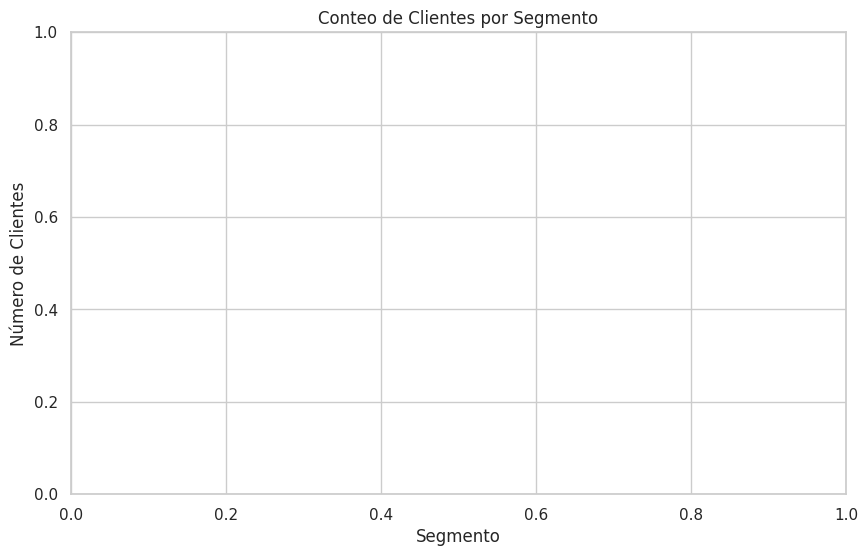

In [84]:
# prompt: Conteo de Clientes por Segmento

# Assuming the code from the previous response is already executed and the 'rfm' DataFrame is available.

import matplotlib.pyplot as plt
import seaborn as sns

# 6.2 Conteo de Clientes por Segmento
# Assuming 'rfm' DataFrame has a 'Segment' column created in the previous steps


plt.figure(figsize=(10, 6))

plt.title('Conteo de Clientes por Segmento')
plt.xlabel('Segmento')
plt.ylabel('Número de Clientes')
plt.show()


### 6.3 Gráfico de Dispersión: Frequency vs Monetary

Visualizaremos la relación entre la frecuencia y el gasto, diferenciando por segmento.

In [ ]:
# prompt: Visualizaremos la relación entre la frecuencia y el gasto, diferenciando por segmento

import matplotlib.pyplot as plt
# 6.3 Gráfico de Dispersión: Frequency vs Monetary
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Frequency', y='Monetary', hue='R_Score', data=rfm)
plt.title('Frecuencia vs. Monetario por Segmento')
plt.xlabel('Frecuencia')
plt.ylabel('Monetario')
plt.show()


## 7. Conclusiones y Próximos Pasos

En este taller hemos:

1. **Preparado y limpiado los datos**: Se simuló un DataFrame, se convirtieron las fechas y se creó la columna `TotalPrice`.
2. **Calculado las métricas RFM** para cada cliente.
3. **Asignado puntajes** a cada métrica utilizando cuartiles.
4. **Definido segmentos** de clientes basados en los puntajes.
5. **Visualizado** la distribución de las métricas y los segmentos.

Utiliza estos resultados para diseñar estrategias de marketing específicas para cada segmento (por ejemplo, campañas de retención para los clientes "At Risk" o programas VIP para los "Champions").

¡Felicidades por completar el taller!